In [ ]:
!pip install 

In [1]:
import os
from copy import deepcopy
from itertools import chain
from collections import Counter



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# import pyiomica as pio
# from pyiomica import categorizationFunctions as cf
# from pyiomica import frequencySubjectMatch as fs
# from pyiomica.extendedDataFrame import DataFrame
# from pyiomica.enrichmentAnalyses import ReactomeAnalysis, ExportReactomeEnrichmentReport
%matplotlib inline

In [2]:
### function to check if a folder exists, if not, create it
def initial_folder(folder):
    CHECK_FOLDER = os.path.isdir(folder)
# If folder doesn't exist, then create it.
    if not CHECK_FOLDER:
        os.makedirs(folder)
    return str(folder)

In [3]:
### initial folders
resultDir = initial_folder('../data/')
singleSubDir = initial_folder(resultDir + 'singleSubDir/')
reactDir = initial_folder(singleSubDir + 'reactome/')
frequencyDataDir = initial_folder(resultDir + 'frequencyDataframe/')
datadir = '../data/'

#data files
file1 = 'clinical_tests.txt'
file2 = 'cytokine_abundance.txt'
file3 = 'gut_16s_abundance.txt'
file4 = 'Lipidomics.csv'
file5 = 'Metabolomics.csv'
file6 = 'nares_16s_abundance.txt'
file7 = 'Proteomics.csv'
file8 = 'RNAseq_abundance.txt'
file9 = 'Transcriptomics_VST_excl_3participants.csv'

file_sameple = 'SampleInfo.csv'  ### the samples' information
file_subject = 'SubjectClass.csv'  ### the subjects diabetic class

In [ ]:
pwd

In [78]:
# df_Metabolomics = pd.read_csv(datadir+file5)
df_Metabolomics = pd.read_csv("D:\PES\Projects\ibm_DATATHON\data\Metabolomics.csv")
df_Metabolomics.columns = [str(col) + '+Metabolomics' for col in df_Metabolomics.columns]
df_Metabolomics.rename(columns={'Unnamed: 0+Metabolomics': 'SampleID'}, inplace=True)

In [79]:
df_Metabolomics.head()

,SampleID,Hydroxybutyric acid+Metabolomics,L-Serine+Metabolomics,Thiosulfic acid+Metabolomics,Alpha-ketoisovaleric acid+Metabolomics,Acetylglycine+Metabolomics,L-Valine+Metabolomics,L-Threonine+Metabolomics,L-Cysteine+Metabolomics,Taurine+Metabolomics,...,C29H48O3+Metabolomics,C24H40O8+Metabolomics,C23H29NO9+Metabolomics,C26H29N3O6+Metabolomics,C19H34O15+Metabolomics,C29H41N7O5(2)+Metabolomics,C29H41N7O5(1)+Metabolomics,C32H38N2O8+Metabolomics,C33H42N2O11+Metabolomics,C33H48O15+Metabolomics
0,ZOZOW1T-E11,6792809.056,714702.1865,2003733.970,19322183.62,154612.0355,1639642.026,4071224.559,203884.41320,3731140.417,...,171313.46510,1.538315e+07,799670.8712,62611.299540,460302.0576,6.297272e+05,325860.0954,777823.5177,7938737.744,1.735344e+05
1,ZOZOW1T-E12,4534083.135,362113.4452,4092076.675,11637557.42,113323.6376,2090552.623,2811342.557,21673.66353,4272118.932,...,734146.31070,4.686059e+06,839451.4954,7680.029847,407376.1750,5.903528e+05,511638.0977,855761.8857,7606781.165,1.179684e+05
2,ZOZOW1T-E13,6482788.065,639217.6995,3547979.086,26575908.34,156091.8798,1541442.145,3765428.285,141429.82240,5734239.912,...,275573.72050,6.456702e+06,912909.6882,165264.904900,471304.8475,5.581702e+05,210952.3579,801418.1448,7924662.222,1.602724e+05
3,ZOZOW1T-E14,8203865.828,655479.4633,2392003.862,31559847.48,140290.9125,1562605.380,3312565.706,278243.31640,3969411.384,...,82645.18551,1.637632e+07,944576.8078,46361.600120,479863.0002,1.151865e+06,610667.2973,833316.1525,6187312.139,1.505495e+06
4,ZOZOW1T-E15,9378285.112,667135.7009,2218310.379,23421772.24,183576.7508,1492347.718,4205279.545,325166.73170,4312379.434,...,400836.83730,8.630144e+06,869907.1031,163655.406300,388315.7024,8.980646e+05,448772.2975,768682.9266,9442034.320,1.640463e+05


In [80]:
[col for col in df_Metabolomics.columns if df_Metabolomics[col].isnull().any()]

[]

In [128]:
print(df_Metabolomics.corr())
np.min(np.min(df_Metabolomics.corr()))

                                        Hydroxybutyric acid+Metabolomics  \
Hydroxybutyric acid+Metabolomics                                1.000000   
L-Serine+Metabolomics                                          -0.059070   
Thiosulfic acid+Metabolomics                                   -0.257495   
Alpha-ketoisovaleric acid+Metabolomics                          0.279057   
Acetylglycine+Metabolomics                                      0.392557   
...                                                                  ...   
C29H41N7O5(2)+Metabolomics                                     -0.155657   
C29H41N7O5(1)+Metabolomics                                     -0.173332   
C32H38N2O8+Metabolomics                                         0.164801   
C33H42N2O11+Metabolomics                                        0.134549   
C33H48O15+Metabolomics                                         -0.056224   

                                        L-Serine+Metabolomics  \
Hydroxybutyric acid+Me

C:\Users\Jeffrey\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:85: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


-0.7459405438546829

In [45]:
# df_Metabolomics = df_Metabolomics.iloc[:,1:].apply(lambda iterator: ((iterator.max() - iterator)/(iterator.max() - iterator.min())).round(2))

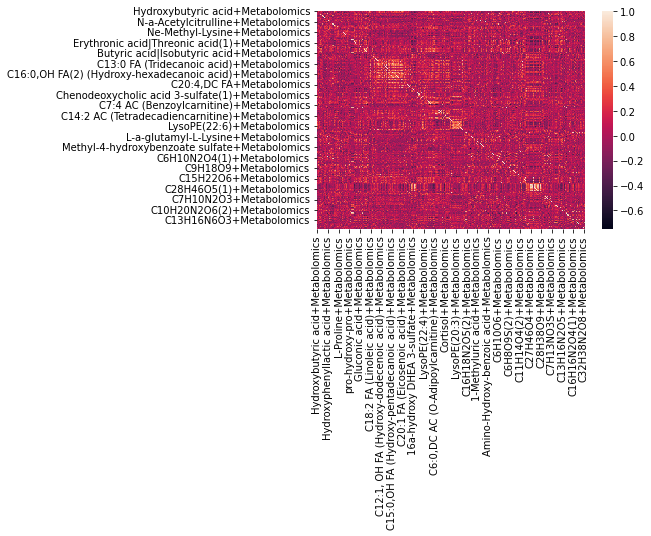

In [82]:
heatmap = sns.heatmap(df_Metabolomics.iloc[:,1:].corr())

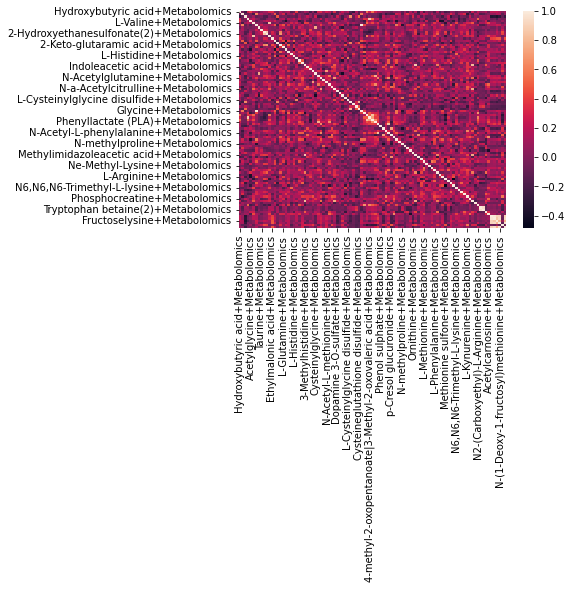

In [83]:
heatmap = sns.heatmap(df_Metabolomics.iloc[:,1:100].corr())

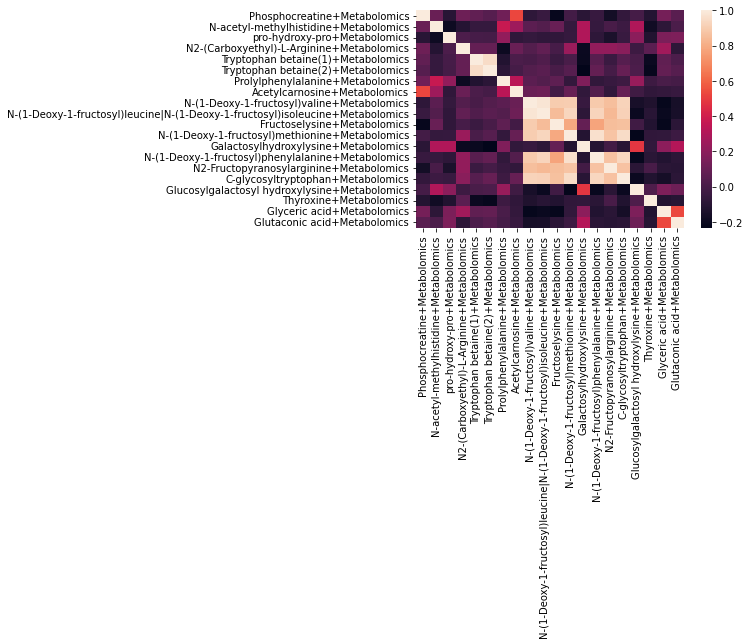

In [48]:
heatmap = sns.heatmap(df_Metabolomics.iloc[:,85:105].corr())

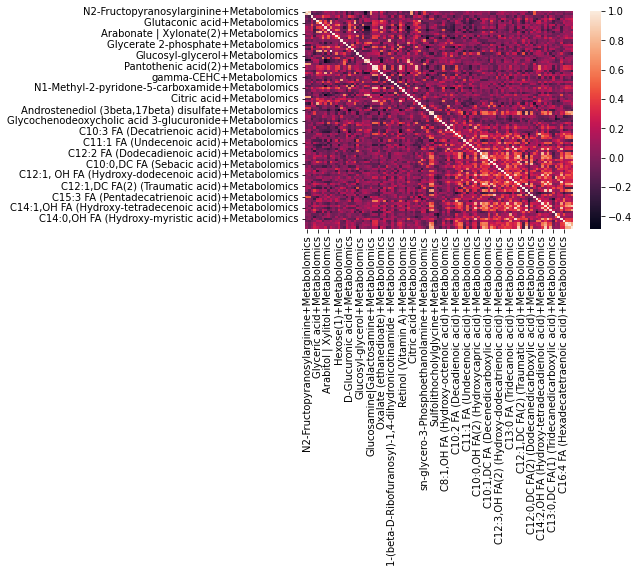

In [84]:
heatmap = sns.heatmap(df_Metabolomics.iloc[:,100:200].corr())

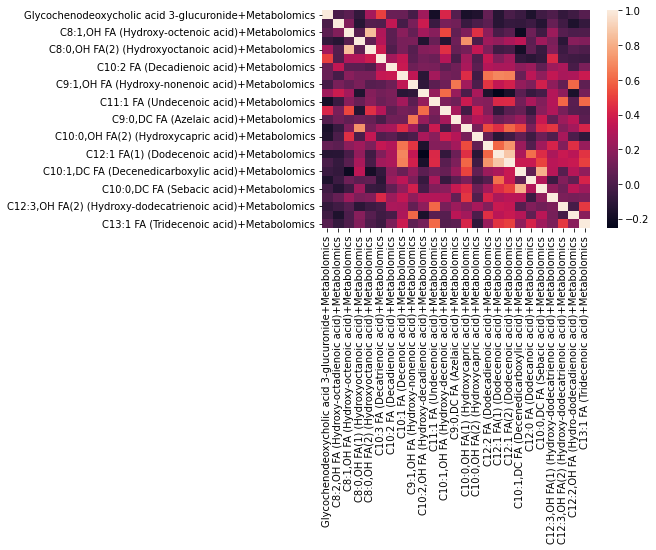

In [85]:
heatmap = sns.heatmap(df_Metabolomics.iloc[:,150:175].corr())

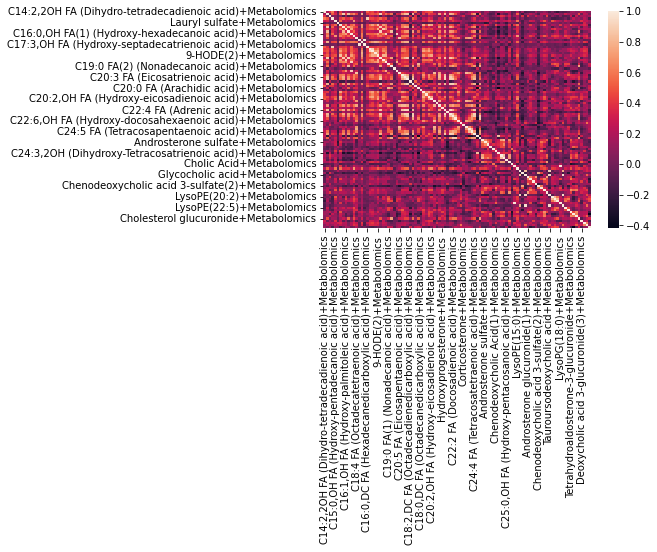

In [86]:
heatmap = sns.heatmap(df_Metabolomics.iloc[:,200:300].corr())

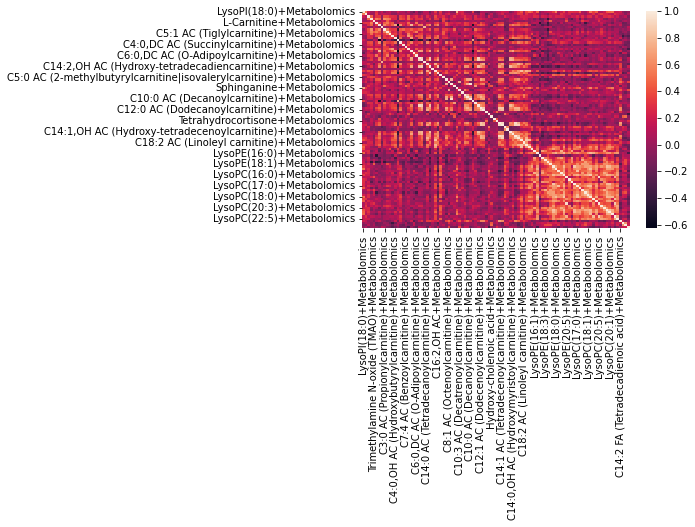

In [87]:
heatmap = sns.heatmap(df_Metabolomics.iloc[:,300:400].corr())

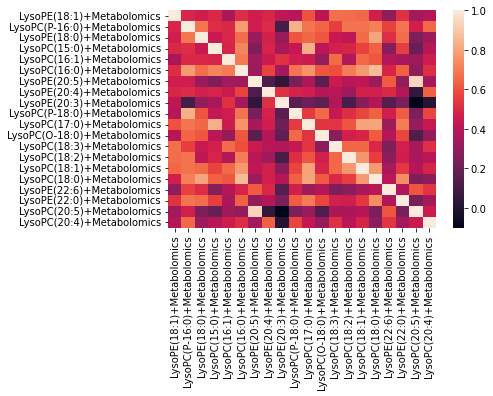

In [88]:
heatmap = sns.heatmap(df_Metabolomics.iloc[:,370:390].corr())

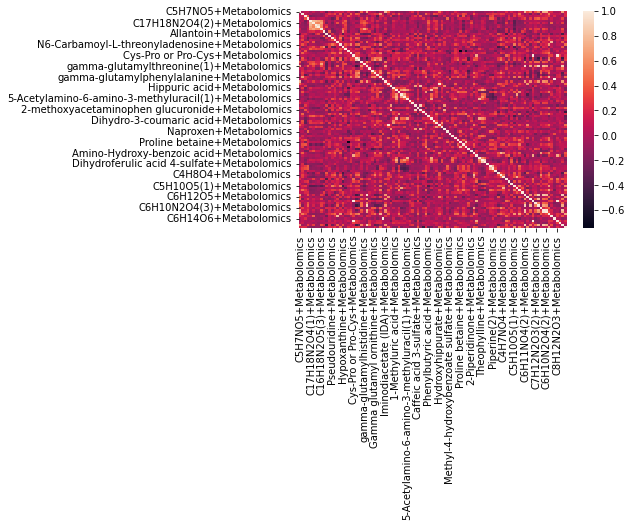

In [89]:
heatmap = sns.heatmap(df_Metabolomics.iloc[:,400:500].corr())

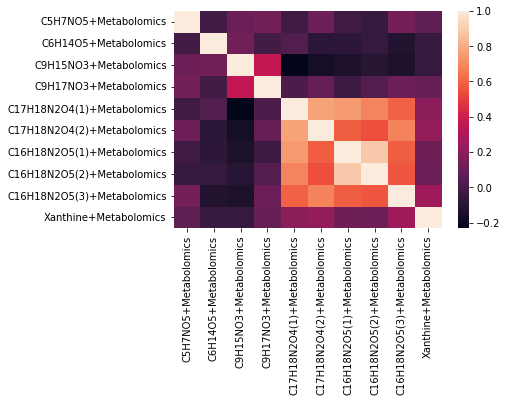

In [90]:
heatmap = sns.heatmap(df_Metabolomics.iloc[:,400:410].corr())

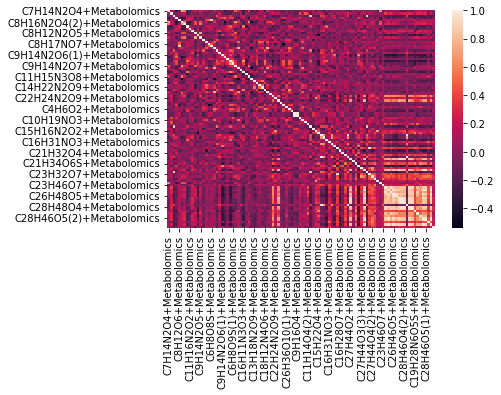

In [91]:
heatmap = sns.heatmap(df_Metabolomics.iloc[:,500:600].corr())

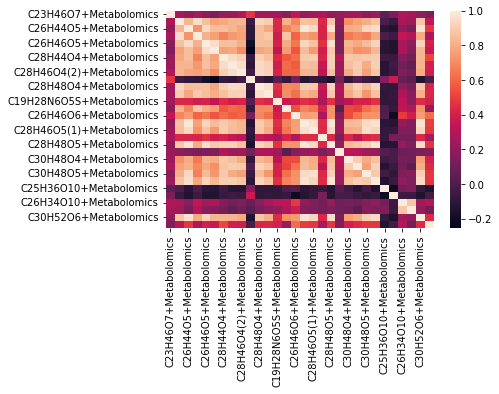

In [92]:
heatmap = sns.heatmap(df_Metabolomics.iloc[:,580:610].corr())

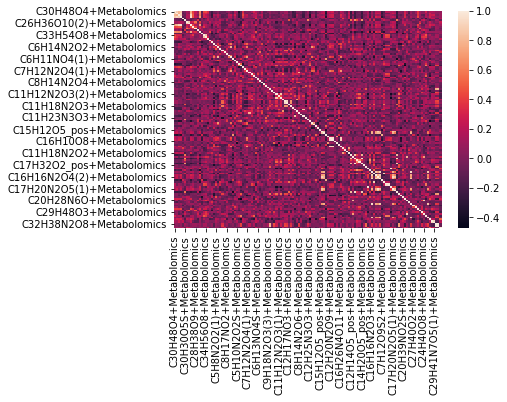

In [93]:
heatmap = sns.heatmap(df_Metabolomics.iloc[:,600:].corr())

In [103]:
df=df_Metabolomics.copy()

In [104]:
cor_matrix = df.corr()
# print(cor_matrix)
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
# print(upper_tri)

In [112]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9) ]
len(to_drop)

116

In [114]:
to_drop1 = [column for column in upper_tri.columns if any(upper_tri[column] <-0.5) ]
len(to_drop1)

29

In [134]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j])> threshold and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr # extracting a list of columns with high threshold

In [132]:
x=correlation(df_Metabolomics,-0.6)

In [133]:
print(x)
len(x)

{'C16H10O8+Metabolomics', 'C12H19N3O7+Metabolomics', 'Proline betaine+Metabolomics', 'Glycerophosphocholine+Metabolomics'}


4

In [135]:
y=correlation(df_Metabolomics,0.9)

In [136]:
print(y)
len(y)

{'C8H16N2O4(2)+Metabolomics', 'LysoPC(18:1)+Metabolomics', 'C26H44O5+Metabolomics', 'C20H12N4O7+Metabolomics', 'C12H16O6+Metabolomics', 'C8H12O6+Metabolomics', 'C19H28N6O5S+Metabolomics', 'Oxindole+Metabolomics', 'Glycine+Metabolomics', 'C16H15NO5+Metabolomics', 'C29H41N7O5(1)+Metabolomics', '6-(alpha-D-Glucosaminyl)-1D-myo-inositol+Metabolomics', 'C12H22N6O2+Metabolomics', 'C19H34O15+Metabolomics', 'C14:1 AC (Tetradecenoylcarnitine)+Metabolomics', 'C10:0,OH AC (Hydroxydecanoyl carnitine)+Metabolomics', 'C-glycosyltryptophan+Metabolomics', 'C13H16N6O3+Metabolomics', 'C30H48O5+Metabolomics', 'C28H46O4(1)+Metabolomics', 'gamma-glutamylhistidine+Metabolomics', 'C28H46O5(1)+Metabolomics', 'C3:1 AC (Propenoylcarnitine)+Metabolomics', 'C13H18O5_pos+Metabolomics', 'Nicotinamide+Metabolomics', 'C26H36O10(1)+Metabolomics', 'Hydroxyhippurate+Metabolomics', 'C7H10N2O3+Metabolomics', 'C21H20O11+Metabolomics', 'Tauroursodeoxycholic acid+Metabolomics', 'C16H24O5_pos+Metabolomics', 'C12H19N3O9+Metabo

108

In [152]:
df_neg=df_Metabolomics[["SampleID",'C16H10O8+Metabolomics', 'C12H19N3O7+Metabolomics', 'Proline betaine+Metabolomics', 'Glycerophosphocholine+Metabolomics']]

In [153]:
df_neg.head()

,SampleID,C16H10O8+Metabolomics,C12H19N3O7+Metabolomics,Proline betaine+Metabolomics,Glycerophosphocholine+Metabolomics
0,ZOZOW1T-E11,5720239.466,627305.35050,6435942.300,2.409634e+07
1,ZOZOW1T-E12,3515103.312,63708.39079,6164721.416,2.968691e+06
2,ZOZOW1T-E13,5223043.245,64063.62890,5428028.745,5.208376e+06
3,ZOZOW1T-E14,5176129.511,151423.55090,5593788.373,6.263232e+06
4,ZOZOW1T-E15,5060508.803,199042.53830,6672437.581,6.903836e+06


In [162]:
df_pos=df_Metabolomics[['C8H16N2O4(2)+Metabolomics', 'LysoPC(18:1)+Metabolomics', 'C26H44O5+Metabolomics', 'C20H12N4O7+Metabolomics', 'C12H16O6+Metabolomics', 'C8H12O6+Metabolomics', 'C19H28N6O5S+Metabolomics', 'Oxindole+Metabolomics', 'Glycine+Metabolomics', 'C16H15NO5+Metabolomics', 'C29H41N7O5(1)+Metabolomics', '6-(alpha-D-Glucosaminyl)-1D-myo-inositol+Metabolomics', 'C12H22N6O2+Metabolomics', 'C19H34O15+Metabolomics', 'C14:1 AC (Tetradecenoylcarnitine)+Metabolomics', 'C10:0,OH AC (Hydroxydecanoyl carnitine)+Metabolomics', 'C-glycosyltryptophan+Metabolomics', 'C13H16N6O3+Metabolomics', 'C30H48O5+Metabolomics', 'C28H46O4(1)+Metabolomics', 'gamma-glutamylhistidine+Metabolomics', 'C28H46O5(1)+Metabolomics', 'C3:1 AC (Propenoylcarnitine)+Metabolomics', 'C13H18O5_pos+Metabolomics', 'Nicotinamide+Metabolomics', 'C26H36O10(1)+Metabolomics', 'Hydroxyhippurate+Metabolomics', 'C7H10N2O3+Metabolomics', 'C21H20O11+Metabolomics', 'Tauroursodeoxycholic acid+Metabolomics', 'C16H24O5_pos+Metabolomics', 'C12H19N3O9+Metabolomics', 'C28H46O5(2)+Metabolomics', 'C30H52O6+Metabolomics', 'C8H12N2O5+Metabolomics', 'C14:2,OH FA (Hydroxy-tetradecadienoic acid)+Metabolomics', 'Glucaric acid+Metabolomics', 'C18:3,OH FA (Hydroxylinolenic acid)+Metabolomics', 'C23H32O7+Metabolomics', 'C10H17N7O5+Metabolomics', 'Hippuric acid+Metabolomics', 'C16H26N4O11+Metabolomics', 'C15H20N2O9+Metabolomics', 'C33H42N2O11+Metabolomics', 'C26H36O10(2)+Metabolomics', 'C17H18N2O4(3)+Metabolomics', 'C28H46O4(2)+Metabolomics', 'Cys-Pro or Pro-Cys+Metabolomics', 'C26H48O5+Metabolomics', 'Ketodeoxycholic acid(3)+Metabolomics', 'Pantothenic acid(1)+Metabolomics', 'C26H42O4+Metabolomics', 'Taurocholic acid+Metabolomics', 'C11H23N3O3+Metabolomics', 'C28H48O5+Metabolomics', 'C24:4 FA (Tetracosatetraenoic acid)+Metabolomics', 'C27H48O4+Metabolomics', 'C6H11NO4(1)+Metabolomics', 'C6H14O6+Metabolomics', 'C10:0 AC (Decanoylcarnitine)+Metabolomics', 'C16H14N2O3+Metabolomics', 'LysoPG(18:0)+Metabolomics', 'C7H12O9S2+Metabolomics', 'C6H11NO4(2)+Metabolomics', 'C19:1 FA (Nonadecaenoic acid)+Metabolomics', 'C14:0,OH FA (Hydroxy-myristic acid)+Metabolomics', 'C19H21NO3(2)+Metabolomics', 'C11H14N2O3+Metabolomics', 'C6H10N2O4(2)+Metabolomics', 'Hydroxy-cholenoic acid+Metabolomics', 'C7H12N2O3(1)+Metabolomics', 'C5H10O5(3)+Metabolomics', 'C18H12N4O6+Metabolomics', 'C16H16N2O3+Metabolomics', 'Amino-Hydroxy-benzoic acid+Metabolomics', 'C17:1 FA (Heptadecenoic acid)+Metabolomics', '2-methoxyacetaminophen glucuronide+Metabolomics', 'C8H17NO7+Metabolomics', 'Tryptophan betaine(2)+Metabolomics', 'C18:1,OH FA(1) (Hydroxy-oleic acid)+Metabolomics', 'C20H24N2O6+Metabolomics', 'N-(1-Deoxy-1-fructosyl)methionine+Metabolomics', 'C24H36O3+Metabolomics', 'C28H50O4+Metabolomics', 'C16:2 FA (Hexadecadienoic acid)+Metabolomics', 'C17:3,OH FA (Hydroxy-septadecatrienoic acid)+Metabolomics', 'C16:2 AC (Hexadecadienoylcarnitine)+Metabolomics', 'C11H11NO2+Metabolomics', 'C7H8N4O3(1)+Metabolomics', 'C18:0,OH FA (Hydroxy-octadecanoic acid)+Metabolomics', 'C8H12N2O3+Metabolomics', 'C12H14O5_pos+Metabolomics', 'LysoPC(18:2)+Metabolomics', 'C9H18O9+Metabolomics', 'C12H18N2O2(2)+Metabolomics', 'C30H50O5+Metabolomics', 'C8H16O8+Metabolomics', 'C14:1,OH FA (Hydroxy-tetradecenoic acid)+Metabolomics', 'C11:0,DC FA (Undecanedioic acid)+Metabolomics', 'C22:4 FA (Adrenic acid)+Metabolomics', 'LysoPC(18:0)+Metabolomics', 'C5H10N2O2S+Metabolomics', 'C15:0 FA (Pentadecanoic acid)+Metabolomics', 'C28H48O4+Metabolomics', 'C16H16N2O4(2)+Metabolomics', 'C9H16O4+Metabolomics', 'N-(1-Deoxy-1-fructosyl)leucine|N-(1-Deoxy-1-fructosyl)isoleucine+Metabolomics', 'LysoPC(20:5)+Metabolomics']]

In [163]:
df_pos.head()

,C8H16N2O4(2)+Metabolomics,LysoPC(18:1)+Metabolomics,C26H44O5+Metabolomics,C20H12N4O7+Metabolomics,C12H16O6+Metabolomics,C8H12O6+Metabolomics,C19H28N6O5S+Metabolomics,Oxindole+Metabolomics,Glycine+Metabolomics,C16H15NO5+Metabolomics,...,"C11:0,DC FA (Undecanedioic acid)+Metabolomics",C22:4 FA (Adrenic acid)+Metabolomics,LysoPC(18:0)+Metabolomics,C5H10N2O2S+Metabolomics,C15:0 FA (Pentadecanoic acid)+Metabolomics,C28H48O4+Metabolomics,C16H16N2O4(2)+Metabolomics,C9H16O4+Metabolomics,N-(1-Deoxy-1-fructosyl)leucine|N-(1-Deoxy-1-fructosyl)isoleucine+Metabolomics,LysoPC(20:5)+Metabolomics
0,4.281183e+05,1.274632e+08,217357.1819,194380.1290,143227.7899,736426.701100,1340485.923,283929.7351,133352.87400,203417.8525,...,17321.88671,1.712774e+06,55585619.85,1.282795e+06,292935.7341,2848979.337,814844.2665,56019.71098,2.127615e+07,6894043.561
1,1.587634e+06,8.804293e+07,368411.4113,207671.2175,155887.3859,7654.956041,1114471.847,284776.2516,97443.33126,145883.3609,...,34052.12223,4.534891e+05,34816733.33,1.597892e+05,236168.0543,1790418.310,263389.1404,58018.23423,8.024993e+05,5120982.825
2,8.683656e+05,1.173911e+08,297683.8672,218175.6120,148771.5140,120712.262800,1279078.305,299797.6955,130793.95220,214421.1407,...,22945.03207,1.089655e+06,40021001.00,9.300263e+05,422838.1145,3245786.921,392017.5527,91415.81569,6.862088e+06,7631383.198
3,5.650216e+05,1.469440e+08,350937.1871,285367.0911,167349.5008,805800.145300,1823399.096,181877.3963,105350.08160,186034.3336,...,21477.02272,1.919184e+06,63316134.85,1.343827e+06,510752.9007,3954805.693,504023.7412,135581.12050,1.075990e+07,7716658.873
4,6.059979e+05,1.354423e+08,223536.0055,189725.3164,135933.0804,107751.661800,1247719.024,239891.1087,144800.07460,302531.9045,...,15977.24969,1.589609e+06,66922843.80,1.776408e+06,316471.5393,2923122.138,838297.2349,192307.05080,6.812810e+06,7891711.921


In [144]:
df_pos.shape

(176, 108)

In [164]:
reduced_df= pd.concat([df_neg,df_pos], join='inner',axis=1)

In [165]:
reduced_df.head()

,SampleID,C16H10O8+Metabolomics,C12H19N3O7+Metabolomics,Proline betaine+Metabolomics,Glycerophosphocholine+Metabolomics,C8H16N2O4(2)+Metabolomics,LysoPC(18:1)+Metabolomics,C26H44O5+Metabolomics,C20H12N4O7+Metabolomics,C12H16O6+Metabolomics,...,"C11:0,DC FA (Undecanedioic acid)+Metabolomics",C22:4 FA (Adrenic acid)+Metabolomics,LysoPC(18:0)+Metabolomics,C5H10N2O2S+Metabolomics,C15:0 FA (Pentadecanoic acid)+Metabolomics,C28H48O4+Metabolomics,C16H16N2O4(2)+Metabolomics,C9H16O4+Metabolomics,N-(1-Deoxy-1-fructosyl)leucine|N-(1-Deoxy-1-fructosyl)isoleucine+Metabolomics,LysoPC(20:5)+Metabolomics
0,ZOZOW1T-E11,5720239.466,627305.35050,6435942.300,2.409634e+07,4.281183e+05,1.274632e+08,217357.1819,194380.1290,143227.7899,...,17321.88671,1.712774e+06,55585619.85,1.282795e+06,292935.7341,2848979.337,814844.2665,56019.71098,2.127615e+07,6894043.561
1,ZOZOW1T-E12,3515103.312,63708.39079,6164721.416,2.968691e+06,1.587634e+06,8.804293e+07,368411.4113,207671.2175,155887.3859,...,34052.12223,4.534891e+05,34816733.33,1.597892e+05,236168.0543,1790418.310,263389.1404,58018.23423,8.024993e+05,5120982.825
2,ZOZOW1T-E13,5223043.245,64063.62890,5428028.745,5.208376e+06,8.683656e+05,1.173911e+08,297683.8672,218175.6120,148771.5140,...,22945.03207,1.089655e+06,40021001.00,9.300263e+05,422838.1145,3245786.921,392017.5527,91415.81569,6.862088e+06,7631383.198
3,ZOZOW1T-E14,5176129.511,151423.55090,5593788.373,6.263232e+06,5.650216e+05,1.469440e+08,350937.1871,285367.0911,167349.5008,...,21477.02272,1.919184e+06,63316134.85,1.343827e+06,510752.9007,3954805.693,504023.7412,135581.12050,1.075990e+07,7716658.873
4,ZOZOW1T-E15,5060508.803,199042.53830,6672437.581,6.903836e+06,6.059979e+05,1.354423e+08,223536.0055,189725.3164,135933.0804,...,15977.24969,1.589609e+06,66922843.80,1.776408e+06,316471.5393,2923122.138,838297.2349,192307.05080,6.812810e+06,7891711.921


In [166]:
reduced_df.shape

(176, 113)

In [151]:

# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 10)
  
X_train = pca.fit_transform(reduced_df)


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [167]:
reduced_df.to_csv("Reduced_Metabolomics.csv")